###DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('/content/adult_with_headers (1).csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [14]:
df.shape

(32561, 15)

1) Handle missing values as per the best practices (imputation, removal, etc.).

In [15]:
###missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [16]:
### duplicate
df.duplicated().sum()

np.int64(24)

In [17]:
### droping the dulicates
df.drop_duplicates(ignore_index=True,inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

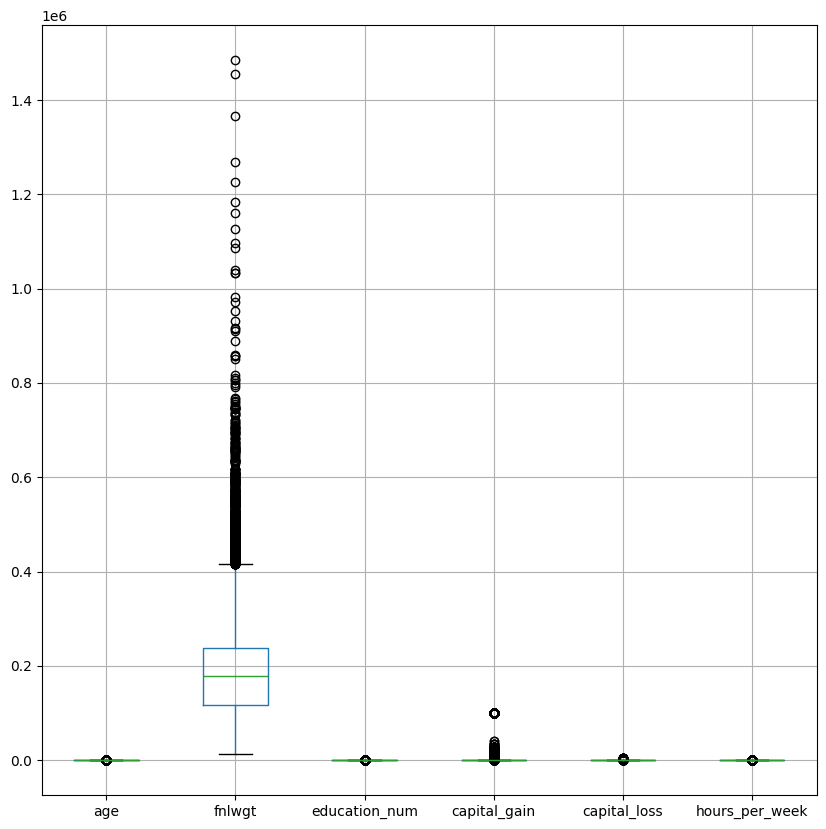

In [19]:
df.boxplot(figsize=(10,10))
plt.show()

In [20]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

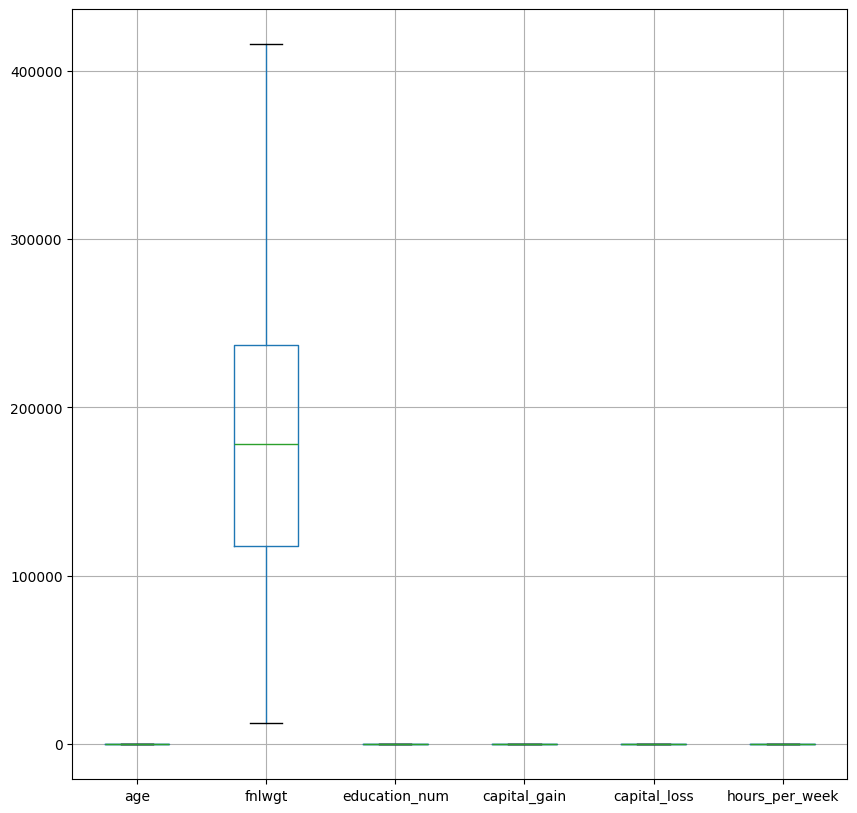

In [21]:
df.boxplot(figsize=(10,10))
plt.show()

● Apply scaling techniques to numerical features:


a) Standard Scaling

b) Min Max Scaling

---



In [23]:
df['education_num'].unique()

array([13. ,  9. ,  7. , 14. ,  5. , 10. , 12. , 11. ,  4.5, 16. , 15. ,
        6. ,  8. ])

In [24]:
scaling_std=['age','fnlwgt']
scaling_min_max=['education_num','capital_gain','capital_loss','hours_per_week']

In [25]:
std_sca=StandardScaler()
min_max_sca=MinMaxScaler()

In [27]:
df[scaling_std]=std_sca.fit_transform(df[scaling_std])

In [28]:
df[scaling_min_max]=min_max_sca.fit_transform(df[scaling_min_max])

In [29]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.000,United-States,<=50K
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.375,United-States,<=50K
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.375,Cuba,<=50K


###● Discuss the scenarios where each scaling technique is preferred and why

Feature scaling ensures that all numeric features contribute equally to a model. StandardScaler is best when data is normally distributed, as it centers values around zero and gives them unit variance—ideal for models like SVM, PCA, or regression. MinMaxScaler scales data to a fixed range (usually 0–1), making it suitable for neural networks and distance-based models where uniform feature range matters. RobustScaler is preferred when the dataset has outliers because it uses the median and interquartile range, reducing the influence of extreme values. Lastly, MaxAbsScaler works well for sparse or zero-centered data, as it scales by the maximum absolute value without changing data sparsity.

##2) Encoding Techniques:

● Apply One-Hot Encoding to categorical variables with less than 5 categories.


In [30]:
### Here sex column has only 2 categories, so we should use one hot encoding for this categoical variable


In [31]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [32]:
one_hot_enc=OneHotEncoder()

In [34]:
df1=pd.DataFrame(one_hot_enc.fit_transform(df[['sex']]).toarray())

In [35]:
df1.columns=['Female','Male']

In [36]:
df=pd.concat([df,df1],axis=1)

In [37]:
df.drop(columns=['sex'],inplace=True)

In [38]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,<=50K,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,<=50K,1.0,0.0


##● Use Label Encoding for categorical variables. Data Exploration and Preprocessing


In [39]:
#### Label Encoder is used if your target column is text and you have to convert it into numbers
#### Here the target value (income) is text and you have to convert it into numbers for classification

In [40]:
LE=LabelEncoder()

In [41]:
df['income']=LE.fit_transform(df['income'])

In [42]:
df['income'].unique()

array([0, 1])

In [43]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


###● Load the dataset and conduct basic data exploration (summary statistics, missing values, data types)

In [44]:
### summary statistics

In [46]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Female,Male
count,3.253700e+04,3.253700e+04,32537.000000,32537.0,32537.0,32537.000000,32537.000000,32537.000000,32537.000000
mean,1.489351e-16,5.568688e-18,0.489145,0.0,0.0,0.435162,0.240926,0.330762,0.669238
std,1.000015e+00,1.000015e+00,0.213864,0.0,0.0,0.309368,0.427652,0.470495,0.470495
min,-1.590589e+00,-1.835009e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,-7.790584e-01,-7.254036e-01,0.391304,0.0,0.0,0.375000,0.000000,0.000000,0.000000
50%,-1.150790e-01,-8.903763e-02,0.478261,0.0,0.0,0.375000,0.000000,0.000000,1.000000
75%,6.964512e-01,5.274370e-01,0.652174,0.0,0.0,0.625000,0.000000,1.000000,1.000000
max,2.909716e+00,2.406698e+00,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [47]:
###check null values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
capital_gain,0


In [48]:
df.dtypes

,0
age,float64
workclass,object
fnlwgt,float64
education,object
education_num,float64
marital_status,object
occupation,object
relationship,object
race,object
capital_gain,float64


###● Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**Pros of One-Hot Encoding**

  1.Good choice for Linear models

  2.Good choice for Tree Models

**Cons od One-Hot Encoding**

  1.N columns are created(N is the no of categories)

  2.Nominal data(categories with no order)

  3.High dimensionality(can lead to the curse of dimensionality)

**Pros of Label Encoding**

  1.Single column of integers

  2.Ordinal data(Categories with order)

  3.Low dimensionality(memory efficient)

**Cons of Label Encoding**

  1.Poor choice for Linear models

  2.Mostly used for Target column

##3) Feature Engineering:


● Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [49]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


In [50]:
df['capital_delta']=df['capital_gain'] - df['capital_loss']

In [51]:
df['is_self_employed']=df['workclass'].apply(lambda x: 1 if 'Self-emp' in x else 0)

In [52]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,capital_delta,is_self_employed
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,0.0,1
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0.0,0


● Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [53]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

In [54]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,capital_delta,is_self_employed,capital_gain_log
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,0.0,1,0.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0.0,0,0.0


Highly skewed data can violate the assumptions of many linear models, and extreme values can distort model training. The $\log1p$ transformation compresses the large values while handling the zero values (of which there are many in capital_gain after scaling to $[0, 1]$) correctly, as $\log(1+0)=0$
